# Loading necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the Data

In [2]:
train1=pd.read_csv("healthcare-dataset-stroke-data.csv",index_col="id")
train2=pd.read_csv("train.csv",index_col="id")
new_data=pd.concat([train1,train2])
graph_data=pd.concat([train1,train2])

In [3]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
rowNumber,columnNumber=new_data.shape
print(f"There are total {rowNumber} rows and {columnNumber} columns in training data frame.")

There are total 20414 rows and 11 columns in training data frame.


In [5]:
test=pd.read_csv("test.csv",index_col="id")
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [6]:
rowNumberTest,columnNumberTest=test.shape
print(f"There are total {rowNumberTest} rows and {columnNumberTest} columns in test data frame.")

There are total 10204 rows and 10 columns in test data frame.


In [7]:
numberOfUniqueValues = new_data.nunique()
numberOfUniqueValues

gender                  3
age                   106
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    4644
bmi                   440
smoking_status          4
stroke                  2
dtype: int64

In [8]:
counts = new_data['stroke'].value_counts()
print(counts)

0    19533
1      881
Name: stroke, dtype: int64


# Data Cleaning

In [9]:
new_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Filling NaN values in the bmi column;

In [10]:
meanOfBmiWithNoStroke = new_data[new_data['stroke']==0]['bmi'].mean()
meanOfBmiWithStroke = new_data[new_data['stroke']==1]['bmi'].mean()

In [11]:
meanOfBmiWithNoStroke

28.2159653107578

In [12]:
meanOfBmiWithStroke

30.29048751486326

In [13]:
new_data[new_data['stroke']==1]['bmi'].isna().sum()

40

In [14]:
new_data[new_data['stroke']==0]['bmi'].isna().sum()

161

In [15]:
new_data.loc[new_data['stroke']==0, 'bmi'] = new_data[new_data['stroke']==0]['bmi'].fillna(meanOfBmiWithNoStroke)
new_data.loc[new_data['stroke']==1, 'bmi'] = new_data[new_data['stroke']==1]['bmi'].fillna(meanOfBmiWithStroke)
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.290488,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Encoding the Values in the Columns

In this part, we are encoding the values in the columns whose dtype is 'object'. Thus we can use the data frame easily on our model to predict the ungiven stroke values in the 'test.csv' file.

In [16]:
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        encoded_values, labels = pd.factorize(new_data[column])
        new_data[column] = encoded_values
        print(f"Column '{column}' has been encoded with the following labels:")
        print(labels)
        print()
print(new_data)

Column 'gender' has been encoded with the following labels:
Index(['Male', 'Female', 'Other'], dtype='object')

Column 'ever_married' has been encoded with the following labels:
Index(['Yes', 'No'], dtype='object')

Column 'work_type' has been encoded with the following labels:
Index(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], dtype='object')

Column 'Residence_type' has been encoded with the following labels:
Index(['Urban', 'Rural'], dtype='object')

Column 'smoking_status' has been encoded with the following labels:
Index(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], dtype='object')

       gender   age  hypertension  heart_disease  ever_married  work_type  \
id                                                                          
9046        0  67.0             0              1             0          0   
51676       1  61.0             0              0             0          1   
31112       0  80.0             0              1            

In [17]:
for column in test.columns:
    if test[column].dtype == 'object':
        encoded_values, labels = pd.factorize(test[column])
        test[column] = encoded_values
        print(f"Column '{column}' has been encoded with the following labels:")
        print(labels)
        print()
print(test)

Column 'gender' has been encoded with the following labels:
Index(['Female', 'Male', 'Other'], dtype='object')

Column 'ever_married' has been encoded with the following labels:
Index(['Yes', 'No'], dtype='object')

Column 'work_type' has been encoded with the following labels:
Index(['Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'], dtype='object')

Column 'Residence_type' has been encoded with the following labels:
Index(['Rural', 'Urban'], dtype='object')

Column 'smoking_status' has been encoded with the following labels:
Index(['Unknown', 'smokes', 'never smoked', 'formerly smoked'], dtype='object')

       gender   age  hypertension  heart_disease  ever_married  work_type  \
id                                                                          
15304       0  57.0             0              0             0          0   
15305       1  70.0             1              0             0          0   
15306       0   5.0             0              0            

In [18]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
51676,1,61.0,0,0,0,1,1,202.21,30.290488,1,1
31112,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
60182,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
1665,1,79.0,1,0,0,1,1,174.12,24.000000,1,1


# Getting Correlation Between Variables

In [19]:
correlation = new_data.corr()['stroke']
correlation=correlation.drop("stroke")
correlation_ordered=correlation.sort_values(ascending=False)
correlation_ordered

age                  0.257244
hypertension         0.139956
avg_glucose_level    0.138361
heart_disease        0.119157
bmi                  0.060331
Residence_type      -0.003977
gender              -0.013851
work_type           -0.051191
smoking_status      -0.063218
ever_married        -0.112078
Name: stroke, dtype: float64

# Data Visualization 

At this part we are visualizing the data to see the relations between variables and stroke rate.

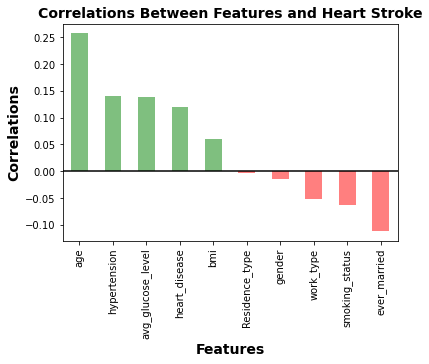

In [20]:
colors = ['green' if c > 0 else 'red' for c in correlation_ordered]

correlation_ordered.plot.bar(color=colors,alpha=0.5)
plt.xlabel('Features',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Correlations',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Correlations Between Features and Heart Stroke', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.axhline(y=0, color='black', linestyle='-')
plt.show()

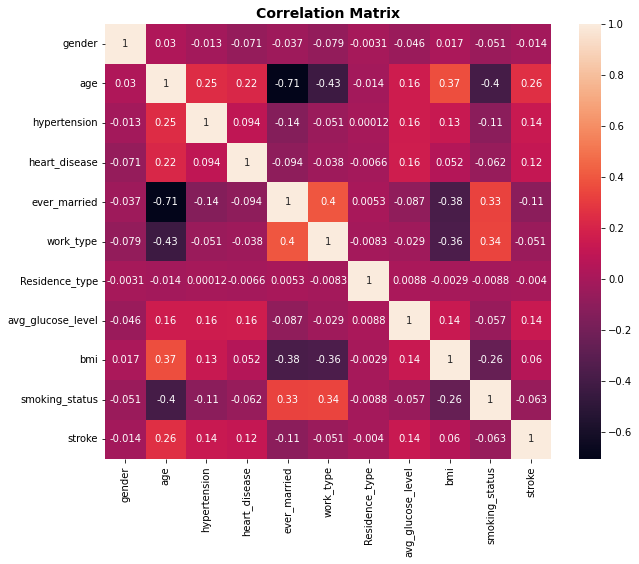

In [21]:
correlation_matrix=new_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,ax=ax)
plt.title('Correlation Matrix', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

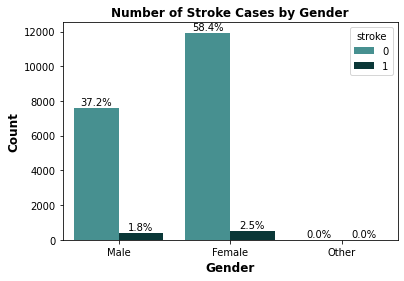

In [22]:
colors = ["#3B9C9C", "#033E3E"]  
ax = sns.countplot(x='gender', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Number of Stroke Cases by Gender', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1, 2], ['Male', 'Female', 'Other'])
plt.xlabel('Gender',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.show()


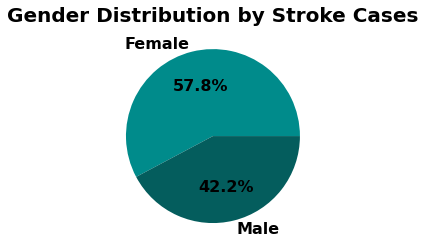

In [23]:
data =graph_data.groupby(['gender', 'stroke']).size().reset_index(name='count')
data = data[data['stroke'] == 1]
colors = ['#008B8B', '#045D5D']
plt.pie(data['count'], labels=data['gender'], autopct='%1.1f%%', colors=colors, textprops={'fontweight': 'bold','fontsize': 16})
plt.title('Gender Distribution by Stroke Cases', fontweight='bold',fontsize=20)
plt.show()


/var/folders/y2/2sd_hv3n4tb0gqh__01658hh0000gn/T/ipykernel_51566/717062389.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stroke_ages, shade=True, color='#008B8B',alpha=0.7)


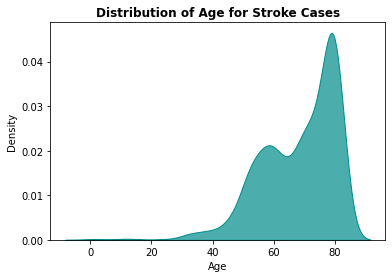

In [24]:
stroke_ages = new_data.loc[new_data['stroke'] == 1, 'age']
sns.kdeplot(stroke_ages, shade=True, color='#008B8B',alpha=0.7)
plt.title('Distribution of Age for Stroke Cases',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


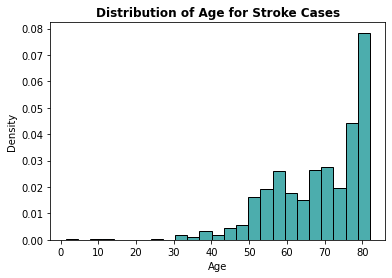

In [25]:
stroke_ages = new_data.loc[new_data['stroke'] == 1, 'age']
sns.histplot(stroke_ages, bins=25, color='#008B8B',alpha=0.7,stat='density')
plt.title('Distribution of Age for Stroke Cases',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


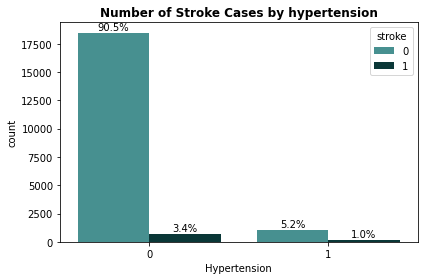

In [26]:
colors = ["#3B9C9C", "#033E3E"]  
ax = sns.countplot(x='hypertension', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Number of Stroke Cases by hypertension', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Hypertension')
plt.tight_layout()
plt.show()

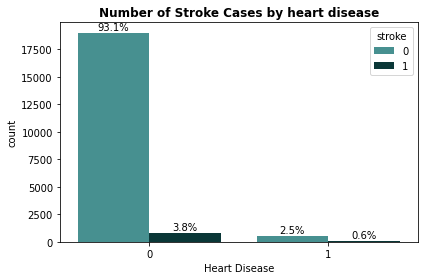

In [27]:
colors = ["#3B9C9C", "#033E3E"]   
ax = sns.countplot(x='heart_disease', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Number of Stroke Cases by heart disease', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Heart Disease')
plt.tight_layout()
plt.show()

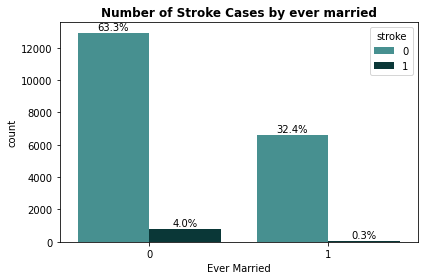

In [28]:
colors = ["#3B9C9C", "#033E3E"]  
ax = sns.countplot(x='ever_married', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Number of Stroke Cases by ever married', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Ever Married')
plt.tight_layout()
plt.show()

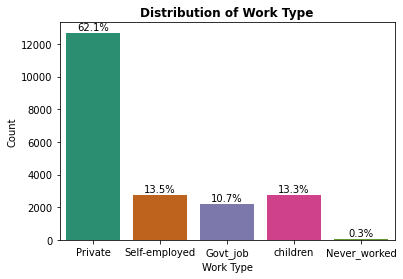

In [29]:
ax=sns.countplot(x='work_type', data=new_data, palette='Dark2')
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Work Type',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1, 2, 3, 4], ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'])
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

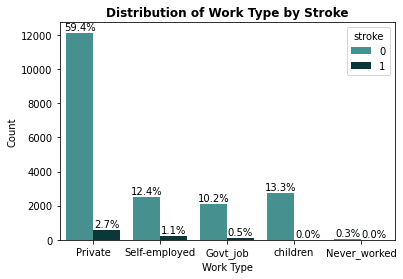

In [30]:
ax=sns.countplot(x='work_type', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Work Type by Stroke',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1, 2, 3, 4], ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'])
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

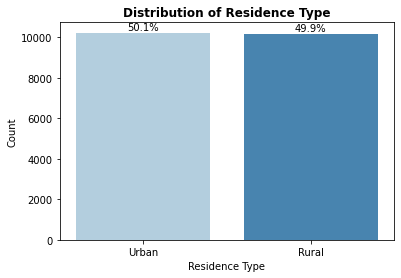

In [31]:
ax=sns.countplot(x='Residence_type', data=new_data, palette='Blues')
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Residence Type',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1], ['Urban', 'Rural'])
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

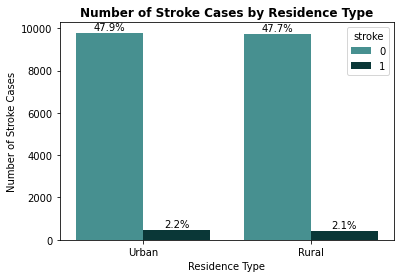

In [32]:
ax=sns.countplot(x='Residence_type', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Number of Stroke Cases by Residence Type',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1], ['Urban', 'Rural'])
plt.xlabel('Residence Type')
plt.ylabel('Number of Stroke Cases')
plt.show()

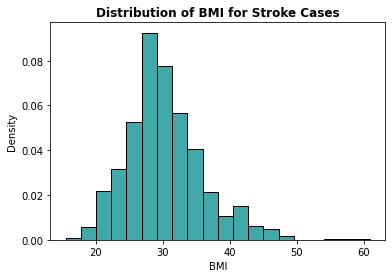

In [33]:
stroke_BMI = new_data.loc[new_data['stroke'] == 1, 'bmi']
sns.histplot(stroke_BMI, bins=20, color='#008B8B', stat='density')
plt.title('Distribution of BMI for Stroke Cases',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

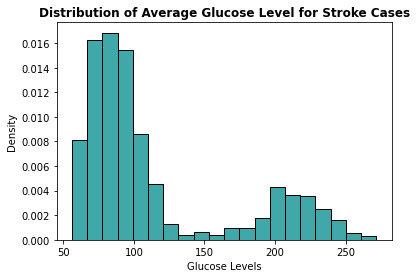

In [34]:
stroke_glucose = new_data.loc[new_data['stroke'] == 1, 'avg_glucose_level']
sns.histplot(stroke_glucose, bins=20, color='#008B8B', stat='density')
plt.title('Distribution of Average Glucose Level for Stroke Cases',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Glucose Levels')
plt.ylabel('Density')
plt.show()

/var/folders/y2/2sd_hv3n4tb0gqh__01658hh0000gn/T/ipykernel_51566/318317057.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=sample_data['stroke'],y=sample_data['bmi'], palette=['green', 'red'], size=5, alpha=0.7, ax=ax)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


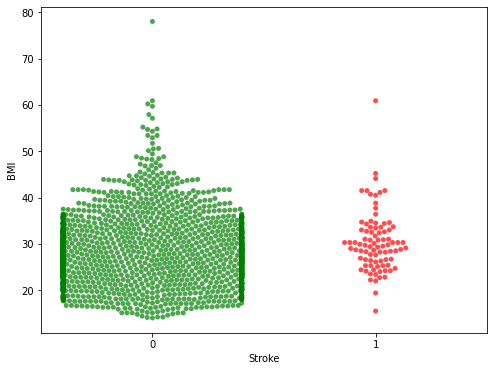

In [35]:
sample_data = new_data.sample(2000, random_state=42)
fig, ax = plt.subplots(figsize=(8, 6))

sns.swarmplot(x=sample_data['stroke'],y=sample_data['bmi'], palette=['green', 'red'], size=5, alpha=0.7, ax=ax)
ax.set_xlabel('Stroke')
ax.set_ylabel('BMI')
plt.show()

/var/folders/y2/2sd_hv3n4tb0gqh__01658hh0000gn/T/ipykernel_51566/3676207489.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=sample_data['stroke'],y=sample_data['avg_glucose_level'], palette=['green', 'red'],size=5, alpha=0.7, ax=ax)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


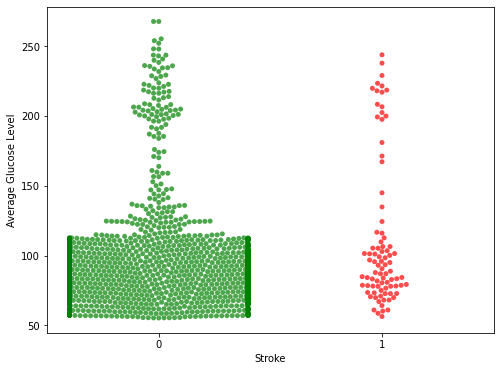

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(x=sample_data['stroke'],y=sample_data['avg_glucose_level'], palette=['green', 'red'],size=5, alpha=0.7, ax=ax)
ax.set_xlabel('Stroke')
ax.set_ylabel('Average Glucose Level')
plt.show()

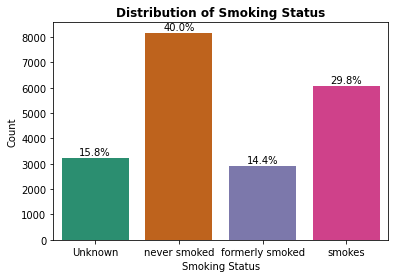

In [37]:
ax=sns.countplot(x='smoking_status', data=new_data, palette='Dark2')
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Smoking Status',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1, 2, 3], ['Unknown', 'never smoked', 'formerly smoked', 'smokes'])
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

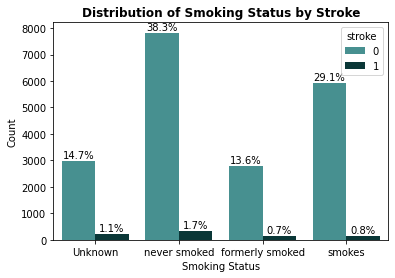

In [38]:
ax=sns.countplot(x='smoking_status', data=new_data, hue='stroke', palette=colors)
total = len(new_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Distribution of Smoking Status by Stroke',fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks([0, 1, 2, 3], ['Unknown', 'never smoked', 'formerly smoked', 'smokes'])
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

# Modeling Part

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Splitting Data

In [40]:
X=new_data.drop("stroke",axis=1)
y=new_data.stroke

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

# XGBRegressor

Choosing the best n_estimator and learning rate for the model:

In [41]:
n_estimators_list = [50, 100, 200, 300, 400]
learning_rates = [0.01, 0.1, 0.5, 1]

for n_estimators in n_estimators_list:
    for lr in learning_rates:
        model = XGBRegressor(n_estimators=n_estimators, learning_rate=lr)
        model.fit(X_train, y_train)

        train_preds = model.predict(X_train)
        train_mae = mean_absolute_error(y_train, train_preds)
        print(f"n_estimators={n_estimators}, learning_rate={lr}, training MAE: {train_mae}")

        valid_preds = model.predict(X_valid)
        valid_mae = mean_absolute_error(y_valid, valid_preds)
        print(f"n_estimators={n_estimators}, learning_rate={lr}, validation MAE: {valid_mae}")
        print()

n_estimators=50, learning_rate=0.01, training MAE: 0.32913354709475284
n_estimators=50, learning_rate=0.01, validation MAE: 0.33108605411220293

n_estimators=50, learning_rate=0.1, training MAE: 0.06113257044245355
n_estimators=50, learning_rate=0.1, validation MAE: 0.0726227653415567

n_estimators=50, learning_rate=0.5, training MAE: 0.043816117694472516
n_estimators=50, learning_rate=0.5, validation MAE: 0.07515872589114277

n_estimators=50, learning_rate=1, training MAE: 0.039884047466847046
n_estimators=50, learning_rate=1, validation MAE: 0.09184382680413833

n_estimators=100, learning_rate=0.01, training MAE: 0.22523676923343114
n_estimators=100, learning_rate=0.01, validation MAE: 0.2286716956894333

n_estimators=100, learning_rate=0.1, training MAE: 0.05291242561643703
n_estimators=100, learning_rate=0.1, validation MAE: 0.06957624719872295

n_estimators=100, learning_rate=0.5, training MAE: 0.03446986748418327
n_estimators=100, learning_rate=0.5, validation MAE: 0.079474616535

In [42]:
model_1=XGBRegressor(n_estimators=100, learning_rate=0.1)
model_1.fit(X_train,y_train)
train_preds = model_1.predict(X_train)
train_mae_of_XGB = mean_absolute_error(y_train, train_preds)
print('Training MAE:', train_mae_of_XGB)

preds = model_1.predict(X_valid)
mae_of_XGB = mean_absolute_error(y_valid, preds)
print('Validation MAE:', mae_of_XGB)

Training MAE: 0.05291242561643703
Validation MAE: 0.06957624719872295


In [43]:
print(preds)

[ 0.00792834  0.04764223  0.02037907 ...  0.0105332  -0.00254614
  0.00315874]


# XGBRegressor with Cross_Validation

In [44]:
#with cross_validation
XGB_cv_scores =np.mean(-cross_val_score(model_1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))

print('Training MAE:', XGB_cv_scores)

preds = model_1.predict(X_valid)
mae_of_XGB = mean_absolute_error(y_valid, preds)
print('Validation MAE:', mae_of_XGB)

Training MAE: 0.07046960956410997
Validation MAE: 0.06957624719872295


In [45]:
test_preds2=model_1.predict(test)
pred2=pd.DataFrame({'id':test.index,'stroke':test_preds2})
pred2.to_csv("predictions9.csv",index=False)

# RandomForestRegressor

In [46]:
n_estimators_list = [50, 100, 200, 300, 400]
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_preds)
    print(f"n_estimators={n_estimators}, training MAE: {train_mae}")

    valid_preds = model.predict(X_valid)
    valid_mae = mean_absolute_error(y_valid, valid_preds)
    print(f"n_estimators={n_estimators}, validation MAE: {valid_mae}")
    print()

n_estimators=50, training MAE: 0.02757920519257853
n_estimators=50, validation MAE: 0.07350297983508859

n_estimators=100, training MAE: 0.027639346437246137
n_estimators=100, validation MAE: 0.07449146869132174

n_estimators=200, training MAE: 0.027557778662257875
n_estimators=200, validation MAE: 0.07520954771818109

n_estimators=300, training MAE: 0.027412110865206205
n_estimators=300, validation MAE: 0.07498189550944877

n_estimators=400, training MAE: 0.027492491274263668
n_estimators=400, validation MAE: 0.07494225038778675



In [47]:
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model2.fit(X_train, y_train)

train_preds=rf_model2.predict(X_train)
train_mae_of_RF2=mean_absolute_error(y_train,train_preds)
print('Training MAE:', train_mae_of_RF2)

preds3 = rf_model2.predict(X_valid)
mae_of_RF2 = mean_absolute_error(y_valid, preds3)
print('Validation MAE:', mae_of_RF2)


Training MAE: 0.02748478937224268
Validation MAE: 0.07527049438438124


# RandomForestRegressor with Cross_validation

In [48]:
#with cross_validation
RF2_cv_scores =np.mean(-cross_val_score(rf_model2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))

print('Training MAE:', RF2_cv_scores)

preds = rf_model2.predict(X_valid)
mae_of_RF2 = mean_absolute_error(y_valid, preds)
print('Validation MAE:', mae_of_RF2)

Training MAE: 0.07481967336417597
Validation MAE: 0.07527049438438124


In [49]:
test_preds3=rf_model2.predict(test)

pred3=pd.DataFrame({'id':test.index,'stroke':test_preds3})
pred3.to_csv("predictions4.csv",index=False)

# Upsamling the Data

In [50]:
minor_class = new_data[new_data.stroke == 1]
major_class = new_data[new_data.stroke == 0]
upsampled_minority = minor_class.sample(n=len(major_class), replace=True, random_state=42)
resampled_data = pd.concat([major_class, upsampled_minority])
y_resampled = resampled_data.stroke
X_resampled = resampled_data.drop(['stroke'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2)

# RandomForestRegressor with Upsampling

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
train_preds = rf_model.predict(X_train)
train_mae_of_RF = mean_absolute_error(y_train, train_preds)
print('Training MAE:', train_mae_of_RF)

preds = rf_model.predict(X_valid)
mae_of_RF = mean_absolute_error(y_valid, preds)
print('Validation MAE:', mae_of_RF)



Training MAE: 0.011355161436940462
Validation MAE: 0.029192513821736793


# RandomForestRegressor with Upsampling with Cross_validation

In [52]:
#with cross_validation
RF_cv_scores =np.mean(-cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))

print('Training MAE:', RF_cv_scores)

preds = rf_model.predict(X_valid)
mae_of_RF = mean_absolute_error(y_valid, preds)
print('Validation MAE:', mae_of_RF)



Training MAE: 0.036832922448079244
Validation MAE: 0.029192513821736793


In [53]:
#test_preds=rf_model.predict(test)
#pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
#pred.to_csv("predictions1.csv",index=False)

# Comparing models with their MAE's

/var/folders/y2/2sd_hv3n4tb0gqh__01658hh0000gn/T/ipykernel_51566/235110250.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['x'], rotation=45)


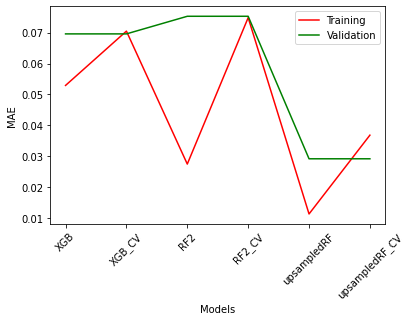

In [54]:
data = pd.DataFrame({'x': ['XGB','XGB_CV','RF2','RF2_CV','upsampledRF','upsampledRF_CV'], 'training': [train_mae_of_XGB, XGB_cv_scores, train_mae_of_RF2,RF2_cv_scores,train_mae_of_RF,RF_cv_scores], 'validation': [mae_of_XGB,mae_of_XGB,mae_of_RF2,mae_of_RF2,mae_of_RF,mae_of_RF]})
ax = sns.lineplot(data=data, x='x', y='training', color='red', label='Training')
sns.lineplot(data=data, x='x', y='validation', color='green', label='Validation', ax=ax)
ax.set_xticklabels(data['x'], rotation=45)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.legend()

As we can see from the table, with cross-validation, we evaluate the model's performance on multiple splits of the data, which can give a better estimate of the model's true performance on unseen data. However, this also means that the model is evaluated on different parts of the data in each fold, which can result in different predicted values and thus a different MAE for each fold. In contrast, a simple train-test split may not be representative of the model's true performance if the test set is not a good representation of the data distribution.

# GradientBoostingClassifier

In [55]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_valid)

print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))
print(y_pred)

Accuracy Score: 83.73%
Confusion Matrix:
 [[3030  854]
 [ 417 3513]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      3884
           1       0.80      0.89      0.85      3930

    accuracy                           0.84      7814
   macro avg       0.84      0.84      0.84      7814
weighted avg       0.84      0.84      0.84      7814

[1 1 1 ... 1 1 1]


In [56]:
parameters = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.01],
}

grid_search = GridSearchCV(gb_clf, parameters, cv=5)
grid_search.fit(X_train, y_train)


best_gb_clf = grid_search.best_estimator_
best_score_gb_clf = grid_search.best_score_


y_pred = best_gb_clf.predict(X_valid)

print('Best Model:', best_gb_clf)
print('Best Score:', best_score_gb_clf)
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))

Best Model: GradientBoostingClassifier(random_state=42)
Best Score: 0.8286190523116301
Accuracy Score: 83.73%
Confusion Matrix:
 [[3030  854]
 [ 417 3513]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      3884
           1       0.80      0.89      0.85      3930

    accuracy                           0.84      7814
   macro avg       0.84      0.84      0.84      7814
weighted avg       0.84      0.84      0.84      7814



In [57]:
test_preds=gb_clf.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("gb_clf.csv",index=False)

# LogisticRegression

In [58]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_valid)

print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))
print(y_pred)

Accuracy Score: 79.20%
Confusion Matrix:
 [[2996  888]
 [ 737 3193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      3884
           1       0.78      0.81      0.80      3930

    accuracy                           0.79      7814
   macro avg       0.79      0.79      0.79      7814
weighted avg       0.79      0.79      0.79      7814

[0 1 0 ... 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
parameters = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(log_reg, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_log = grid_search.best_estimator_
best_score_log = grid_search.best_score_

y_pred = best_log.predict(X_valid)

print('Best Model:', best_log)
print('Best Score:', best_score_log)
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best Model: LogisticRegression(C=0.1, random_state=42, solver='liblinear')
Best Score: 0.7931973917773156
Accuracy Score: 79.47%
Confusion Matrix:
 [[2961  923]
 [ 681 3249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      3884
           1       0.78      0.83      0.80      3930

    accuracy                           0.79      7814
   macro avg       0.80      0.79      0.79      7814
weighted avg       0.80      0.79      0.79      7814



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
test_preds=log_reg.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("log_reg.csv",index=False)

# RandomForestClassifier

In [61]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_valid)

print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))

Accuracy Score: 99.32%
Confusion Matrix:
 [[3831   53]
 [   0 3930]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3884
           1       0.99      1.00      0.99      3930

    accuracy                           0.99      7814
   macro avg       0.99      0.99      0.99      7814
weighted avg       0.99      0.99      0.99      7814



In [62]:
parameters = {
    'n_estimators': [50,100, 200],  
    'max_depth': [None, 5, 10],       
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}

grid_search = GridSearchCV(rf_clf, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_score_rf = grid_search.best_score_

y_pred = best_rf.predict(X_valid)

print('Best Model:',best_rf)
print('\nBest Score:', best_score_rf)
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))

Best Model: RandomForestClassifier(n_estimators=50, random_state=42)

Best Score: 0.9895367166853305
Accuracy Score: 99.32%
Confusion Matrix:
 [[3831   53]
 [   0 3930]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3884
           1       0.99      1.00      0.99      3930

    accuracy                           0.99      7814
   macro avg       0.99      0.99      0.99      7814
weighted avg       0.99      0.99      0.99      7814



In [63]:
test_preds=rf_clf.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("rf_clf.csv",index=False)

# SVC

In [64]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_valid)

print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, y_pred) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))

Accuracy Score: 79.58%
Confusion Matrix:
 [[2843 1041]
 [ 555 3375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      3884
           1       0.76      0.86      0.81      3930

    accuracy                           0.80      7814
   macro avg       0.80      0.80      0.79      7814
weighted avg       0.80      0.80      0.79      7814



In [65]:
test_preds=svc.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("svc.csv",index=False)

# DecisionTreeClassifier

In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_valid)

print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, predictions) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, predictions))
print('Classification Report:\n', classification_report(y_valid, predictions))

Accuracy Score: 98.00%
Confusion Matrix:
 [[3728  156]
 [   0 3930]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3884
           1       0.96      1.00      0.98      3930

    accuracy                           0.98      7814
   macro avg       0.98      0.98      0.98      7814
weighted avg       0.98      0.98      0.98      7814



In [67]:
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dtree, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_dtree = grid_search.best_estimator_
best_score_dtree = grid_search.best_score_

predictions = best_dtree.predict(X_valid)

print('Best Model:',best_dtree)
print('\nBest Score:', best_score_dtree)
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, predictions) * 100))
print('Confusion Matrix:\n', confusion_matrix(y_valid, predictions))
print('Classification Report:\n', classification_report(y_valid, predictions))

Best Model: DecisionTreeClassifier(min_samples_split=5)

Best Score: 0.9729937917133258
Accuracy Score: 98.16%
Confusion Matrix:
 [[3740  144]
 [   0 3930]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3884
           1       0.96      1.00      0.98      3930

    accuracy                           0.98      7814
   macro avg       0.98      0.98      0.98      7814
weighted avg       0.98      0.98      0.98      7814



In [68]:
test_preds=dtree.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("predictions16.csv",index=False)

# XGBClassifier

In [69]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred) * 100
print('Accuracy Score: {:.2f}%'.format(accuracy))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))
print('Classification Report:\n', classification_report(y_valid, y_pred))
print(y_pred)

Accuracy Score: 95.16%
Confusion Matrix:
 [[3522  362]
 [  16 3914]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      3884
           1       0.92      1.00      0.95      3930

    accuracy                           0.95      7814
   macro avg       0.96      0.95      0.95      7814
weighted avg       0.96      0.95      0.95      7814

[1 1 1 ... 1 1 1]


In [70]:
test_preds=xgb_clf.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("xgb_clf.csv",index=False)

In [71]:
from sklearn.metrics import roc_curve, auc

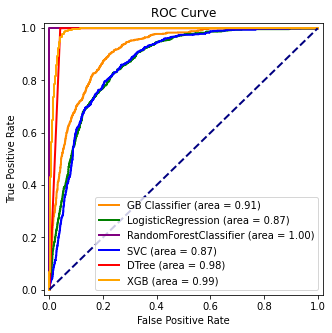

In [72]:
# GradientBoostingClassifier
y_score_gb = gb_clf.decision_function(X_valid)
fpr_gb, tpr_gb, _ = roc_curve(y_valid, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# LogisticRegression
y_score_lr = log_reg.decision_function(X_valid)
fpr_lr, tpr_lr, _ = roc_curve(y_valid, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# RandomForestClassifier
y_score_rf = rf_clf.predict_proba(X_valid)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_valid, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# SVC
y_score_svc = svc.decision_function(X_valid)
fpr_svc, tpr_svc, _ = roc_curve(y_valid, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# DTree 
y_score_dtree = dtree.predict_proba(X_valid)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_valid, y_score_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# XGBClassifier
y_score_xgb = xgb_clf.predict_proba(X_valid)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_valid, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=lw, label='GB Classifier (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_lr, tpr_lr, color='green', lw=lw, label='LogisticRegression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=lw, label='RandomForestClassifier (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svc, tpr_svc, color='blue', lw=lw, label='SVC (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_dtree, tpr_dtree, color='red', lw=lw, label='DTree (area = %0.2f)' % roc_auc_dtree)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=lw, label='XGB (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [73]:
models = []
models.append(('GBC', GradientBoostingClassifier(random_state=42)))
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('SVC', SVC(random_state=42)))
models.append(('XGB', XGBClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('DTree', DecisionTreeClassifier()))

In [74]:
vot_hard = VotingClassifier(estimators = models, voting ='hard')
vot_hard.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('GBC',
                              GradientBoostingClassifier(random_state=42)),
                             ('LR', LogisticRegression(random_state=42)),
                             ('SVC', SVC(random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=N...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('RF', RandomForestClassifier(random_state=42)),
                             ('DTree', DecisionTreeClassifier())])

In [75]:
test_preds=vot_hard.predict(test)

pred=pd.DataFrame({'id':test.index,'stroke':test_preds})
pred.to_csv("vot_hard.csv",index=False)